<a href="https://colab.research.google.com/github/Syruna/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Exercices_IP/S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

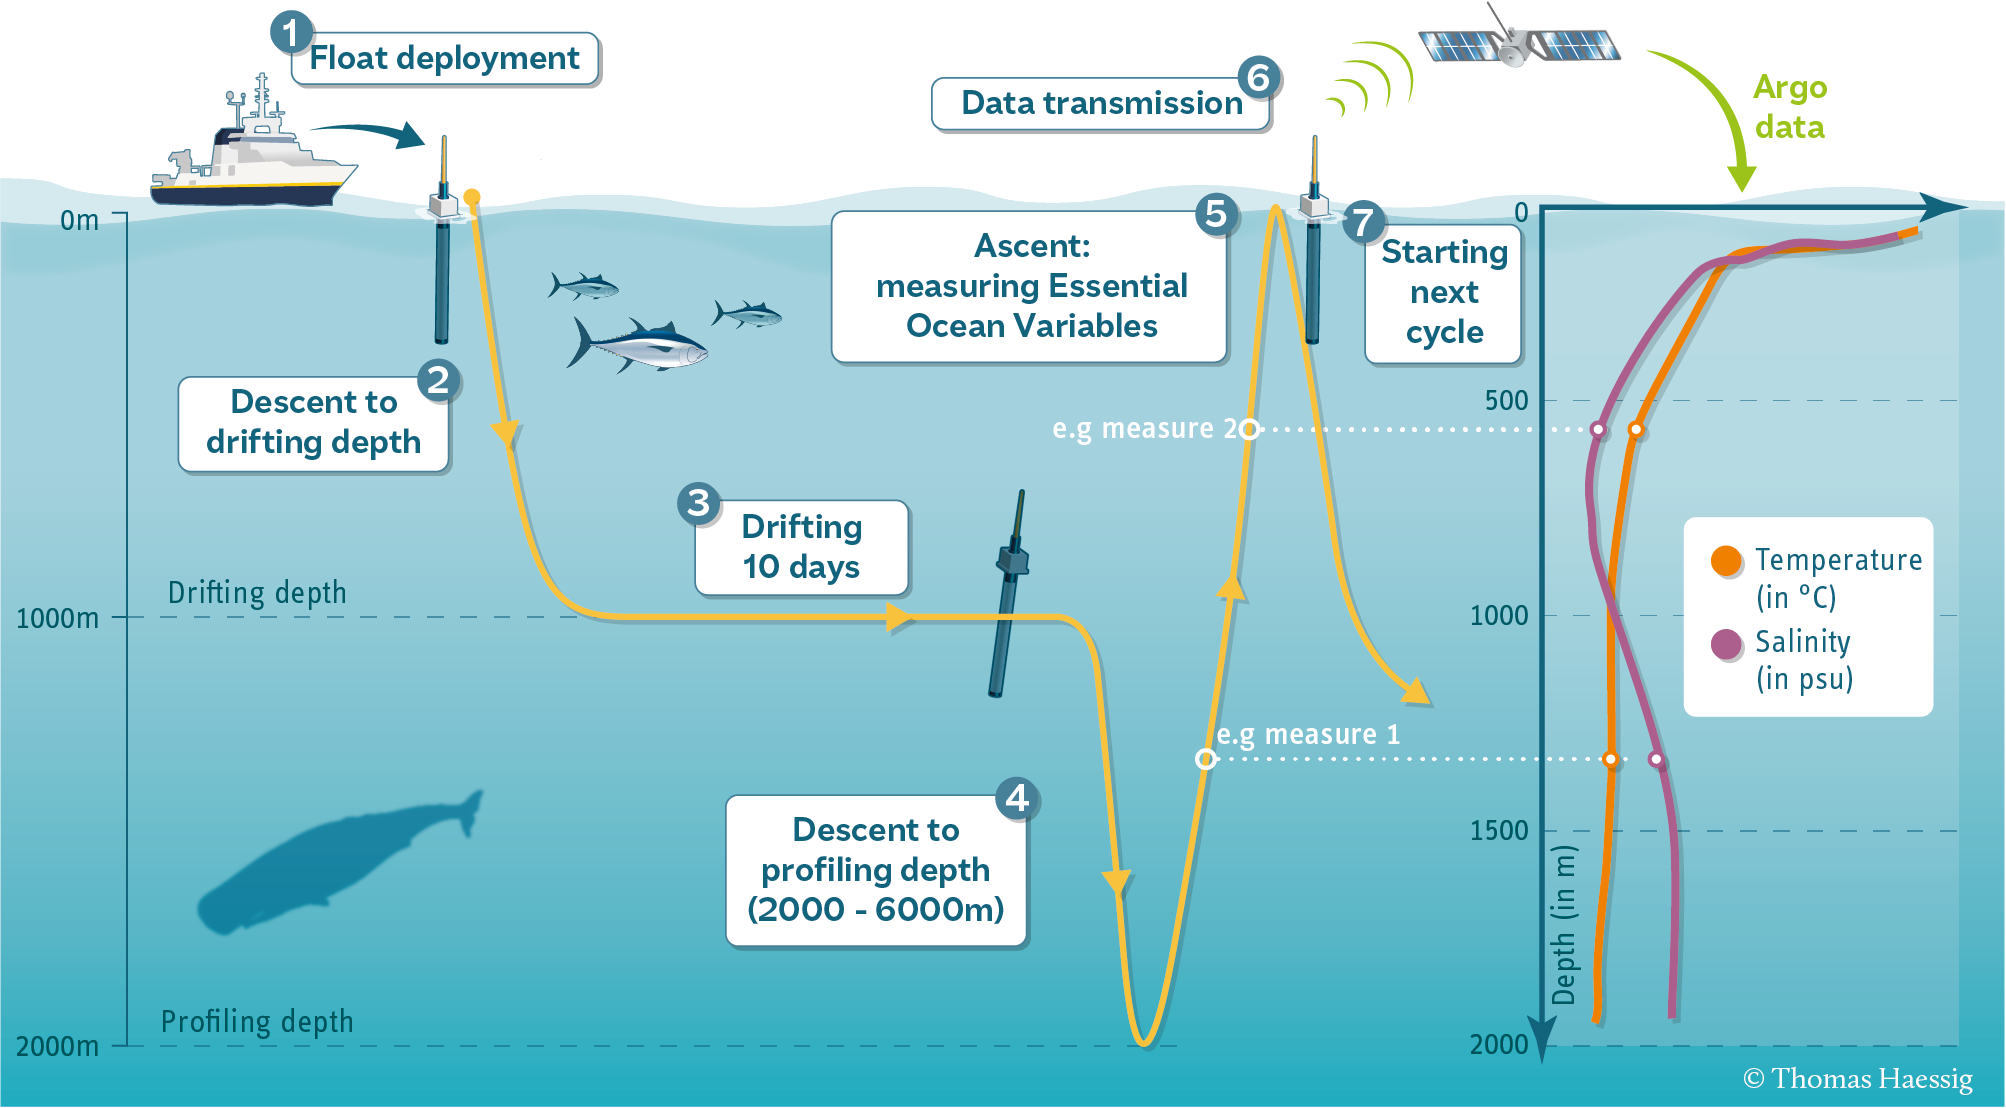


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [104]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [105]:
import numpy as np

**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Afficher les noms des éléments des fichiers ici

In [106]:
T = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy')
S = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy')
P = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy')
Date = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy')
lat = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy')
lon = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy')
level = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy')

Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [107]:
base = [T, S, P, Date, lat, lon, level]
for i in range(len(base)):
  np.array(base[i])

print(base)

[array([[18.97400093, 18.43700027, 19.09900093, ..., 19.11300087,
        21.82299995, 20.13100052],
       [18.74099922, 18.39999962, 19.08200073, ..., 18.47200012,
        19.45999908, 20.125     ],
       [18.37000084, 18.37400055, 19.06500053, ..., 18.22999954,
        19.26199913, 20.07699966],
       ...,
       [ 3.79299998,  3.81399989,  3.80200005, ...,  3.80699992,
         3.81100011,  3.8599999 ],
       [ 3.76399994,  3.77800012,  3.75699997, ...,  3.75399995,
         3.74600005,  3.80599999],
       [ 3.74399996,  3.74600005,  3.7249999 , ...,         nan,
         3.71399999,         nan]]), array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        

**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Afficher le tableau `level` (niveau)

In [ ]:
print(level)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recréer le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [131]:
level_arange = np.arange(0,75)

Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [ ]:
np.testing.assert_equal(level,level_arange)
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [ ]:
level_linspace = np.linspace(0,77,78)
print(level_linspace)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [ ]:
np.testing.assert_equal(level_linspace,level)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Afficher les formes de toutes les variables chargées

In [ ]:
T.shape
S.shape
P.shape

(78, 75)

In [ ]:
lon.shape
lat.shape
Date.shape
level.shape

(78,)

In [ ]:
print(T)

[[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]


D'après les formes, quelles sont les dimensions partagées entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [108]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [129]:
!pip install gsw
from gsw import CT_from_t

Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculer la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [111]:
theta = CT_from_t(S,T,P)

Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [112]:
densite = a*S + b*theta + c*theta**2

**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [100]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

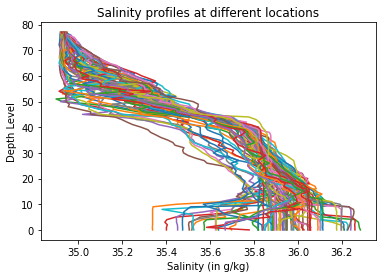

Text(0.5, 1.0, 'Salinity profiles')

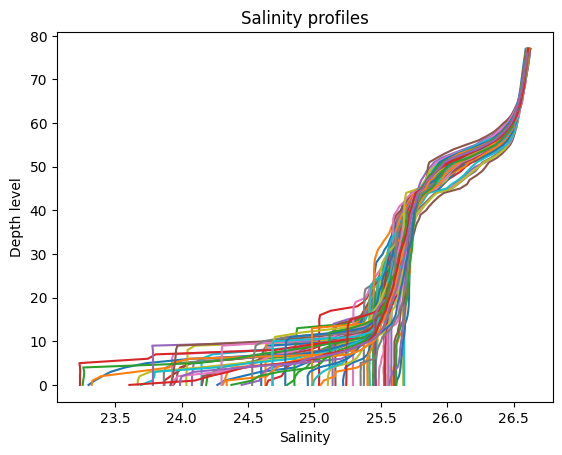

In [113]:
plt.plot(densite,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Salinity") # Prend une chaîne de caractères comme argument
plt.ylabel("Depth level")
plt.title("Salinity profiles")

Faites plus de plots ci-dessous:

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculer les moyennes...

In [141]:
moyenne = np.nanmean(densite, axis = 0)
print(moyenne)

[25.78830223 25.79031389 25.76261747 25.7493401  25.78414184 25.81414743
 25.77385733 25.80226309 25.76548877 25.77874445 25.7871526  25.76302849
 25.76759242 25.77855637 25.79959648 25.81412983 25.82109349 25.85942553
 25.86781623 25.87997839 25.86474715 25.86336451 25.79818017 25.9229791
 25.92649359 25.94198523 25.90432706 25.92760827 25.89006002 25.88797664
 25.8671184  25.89103254 25.84362831 25.84424329 25.83892377 25.79488761
 25.7843484  26.41562632 25.75865769 25.77698909 25.71982028 25.72615219
 25.69071548 25.66989181 25.67392919 25.70535481 25.73885514 25.75663079
 25.76728816 25.78324389 25.78609706 25.81972522 25.87836858 25.86580558
 25.89592959 25.90858468 25.91423429 25.93042251 25.94945813 25.98398034
 25.97642481 25.98584697 25.9775126  25.93822633 25.93703329 25.93964968
 25.92151321 25.92712699 25.8748157  25.86575214 25.87109786 25.83166513
 25.81669182 25.8009087  25.79779165]


In [142]:
moyenne1 = np.nanmean(T, axis = 0)
print(moyenne1)
moyenne2 = np.nanmean(S, axis = 0)
print(moyenne2)
moyenne3 = np.nanmean(P, axis = 0)
print(moyenne3)

[10.88915385 10.7282564  10.9336282  10.75679484 10.38166666 10.08619236
 10.58194804 10.50066671 10.56841555 10.53705122 10.81131168 11.01932052
 11.39205196 11.40823073 11.3642208  11.35821797 11.39444157 11.10514098
 11.02870125 10.80894868 10.93076625 11.01069231 11.88195654 10.57373078
 10.66359736 10.56573237 11.08854546 10.87921792 11.21384416 11.24991028
 11.29168825 11.06203848 11.32829864 11.20401279 11.25300001 11.32106403
 11.40112986  6.07053117 11.7748052  11.7466795  12.03732056 11.92653251
 12.08844156 12.20543591 12.23402598 12.03365387 11.9919221  11.92087012
 11.84273071 11.79711684 11.7895325  11.55385894 11.19083561 11.266282
 11.0611948  11.0307179  11.06566232 10.79799995 10.787      10.41173077
 10.44170127 10.32649998 10.38242857 10.88080769 10.86177921 10.98787178
 10.93602596 10.73039743 11.09251948 10.93983334 10.65942862 11.01814097
 11.21918184 11.19080765 11.13364934]
[35.4300408  35.39465004 35.41946509 35.36729094 35.31889211 35.29478699
 35.36100511 35

... et les écarts types.

In [143]:
ecart = np.nanstd(densite, axis=0)
ecart1 = np.nanstd(T, axis=0)
ecart2 = np.nanstd(S, axis=0)
ecart3 = np.nanstd(P, axis=0)


Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

AttributeError: module 'numpy' has no attribute 'arrange'

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

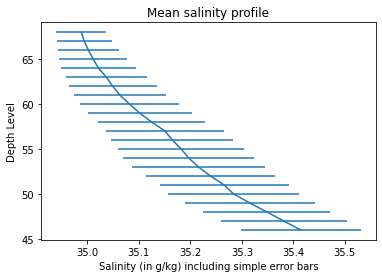

Text(0.5, 1.0, 'Mean salinity profile')

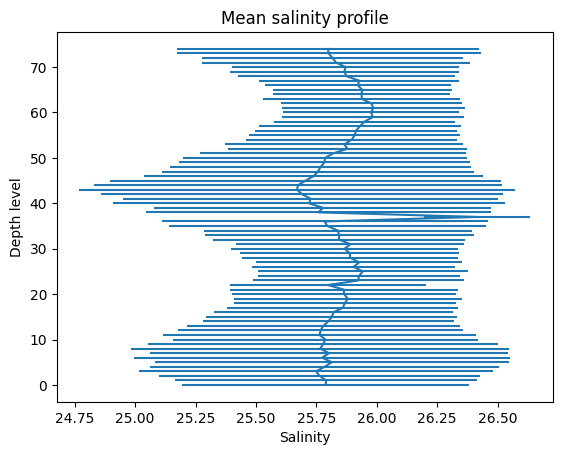

In [144]:
plt.errorbar(moyenne,level_arange, xerr = ecart)
plt.xlabel("Salinity")
plt.ylabel("Depth level")
plt.title("Mean salinity profile")

Encore trois plots et nous serons prêts 🙂 .

Text(0.5, 1.0, 'Mean salinity profile')

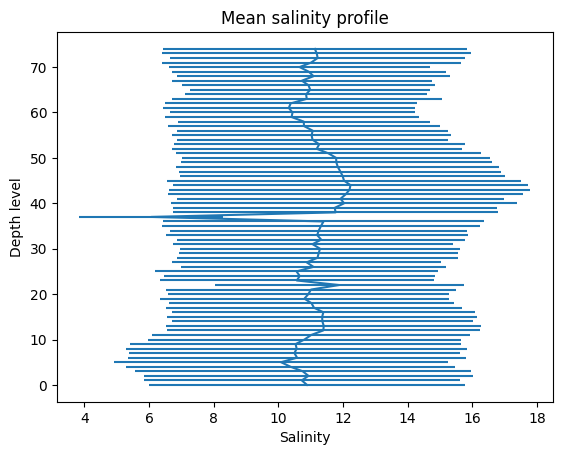

In [145]:
plt.errorbar(moyenne1,level_arange, xerr = ecart1)
plt.xlabel("Salinity")
plt.ylabel("Depth level")
plt.title("Mean salinity profile")

Text(0.5, 1.0, 'Mean salinity profile')

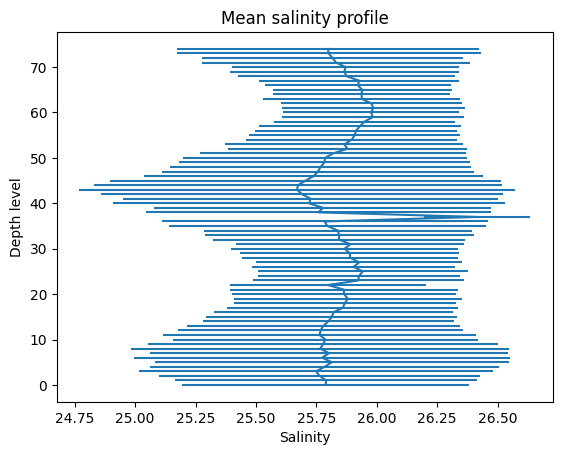

In [146]:
plt.errorbar(moyenne,level_arange, xerr = ecart)
plt.xlabel("Salinity")
plt.ylabel("Depth level")
plt.title("Mean salinity profile")

Text(0.5, 1.0, 'Mean salinity profile')

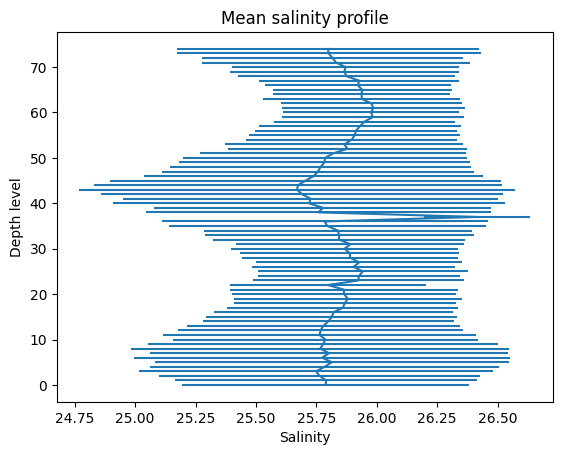

In [147]:
plt.errorbar(moyenne,level_arange, xerr = ecart)
plt.xlabel("Salinity")
plt.ylabel("Depth level")
plt.title("Mean salinity profile")

**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

De même, recalculez les écarts types en ignorant les valeurs manquantes.

**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'Mean salinity profile')

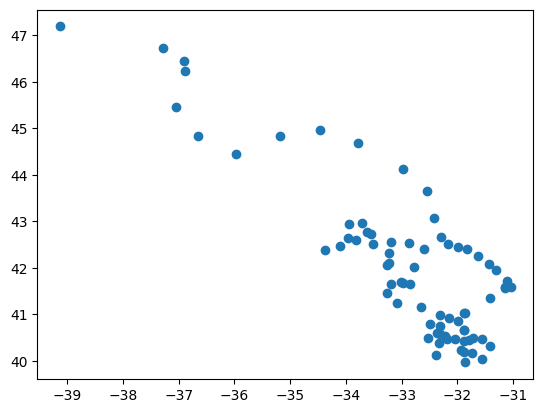

In [148]:
plt.scatter(lon,lat)
___ # Bonus
___ # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [ ]:
# Write your code here
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [ ]:
#write function here
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(n):
  return planetdict[n]/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre("jupiter")

317.92294807370183

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [ ]:
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(n="terre",ourplanet='jupiter') :
  return planetdict[n]/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter('jupiter',"terre"),convert_m_Mterrejupiter('jupiter',"jupiter"))

317.92294807370183 1.0


In [ ]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter('jupiter', 'jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [ ]:
# Écrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet) :
  a = mass/planetdict["terre"] # Terre
  b = mass/planetdict[planet] # La planète que vous voulez utiliser comme référence
  return a,b
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
print(mass_conversion_two_arguments(1898,'mars'))

(317.92294807370183, 2956.386292834891)


In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?